In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix
import pickle

In [23]:
water_quality_df_1 = pd.read_csv("./data/water-quality-site1.csv")
water_quality_df_2 = pd.read_csv("./data/water-quality-site2.csv")
water_quality_df_3 = pd.read_csv("./data/water-quality-site3.csv")
water_quality_df_4 = pd.read_csv("./data/water-quality-site4.csv")

# Lat, Long ,Time, Date, DO-5, Nitrite
water_quality_columns_to_drop = ['Latitude', 'Longitude', 'Time', 'Date', 'Nitrite (mg/L)', 'DO-5 (mg/L)']

In [24]:
### CLEAN DATA BY FILLING EMPTY COLUMS WITH MEAN VALUE

def fill_in_empty_cells_with_average(df):
    df = df.drop(columns=water_quality_columns_to_drop)
    for col in df:    
        df[col].fillna(value=df[col].mean(), inplace=True)
    return df

water_quality_df_1 = fill_in_empty_cells_with_average(water_quality_df_1)
water_quality_df_2 = fill_in_empty_cells_with_average(water_quality_df_2)
water_quality_df_3 = fill_in_empty_cells_with_average(water_quality_df_3)
water_quality_df_4 = fill_in_empty_cells_with_average(water_quality_df_4)

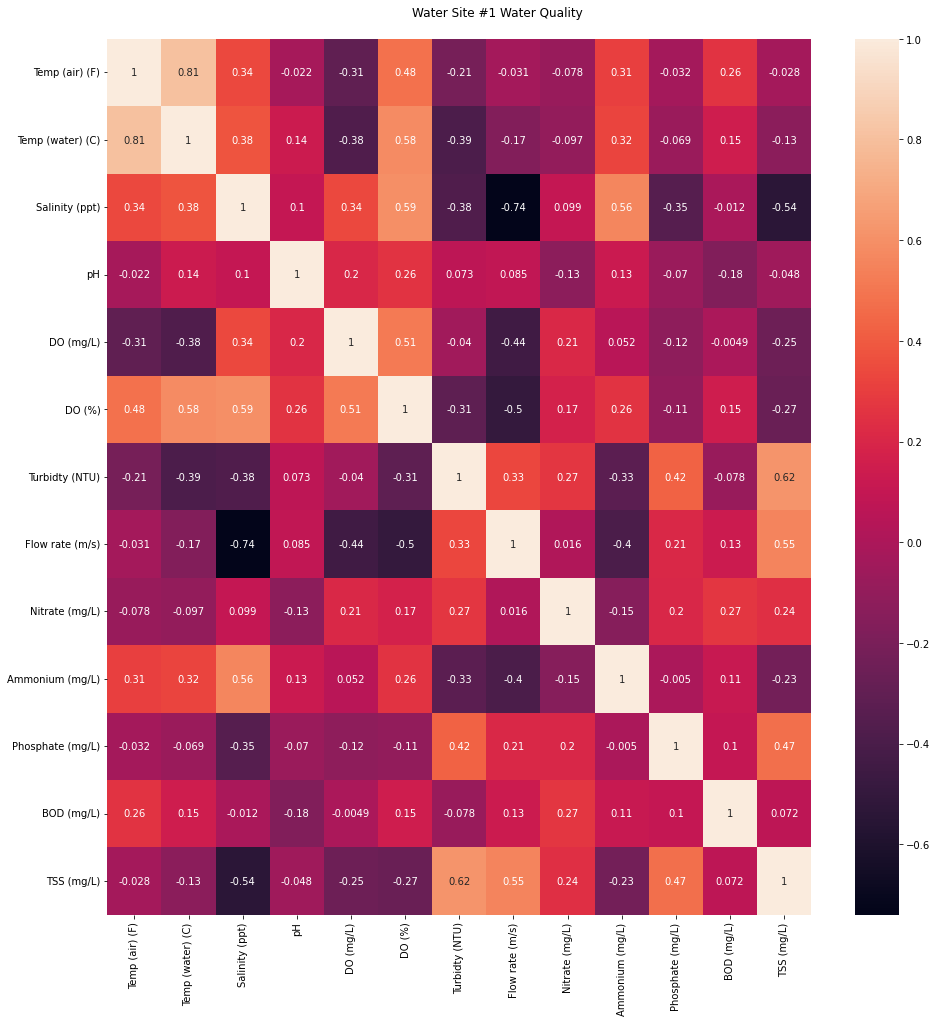

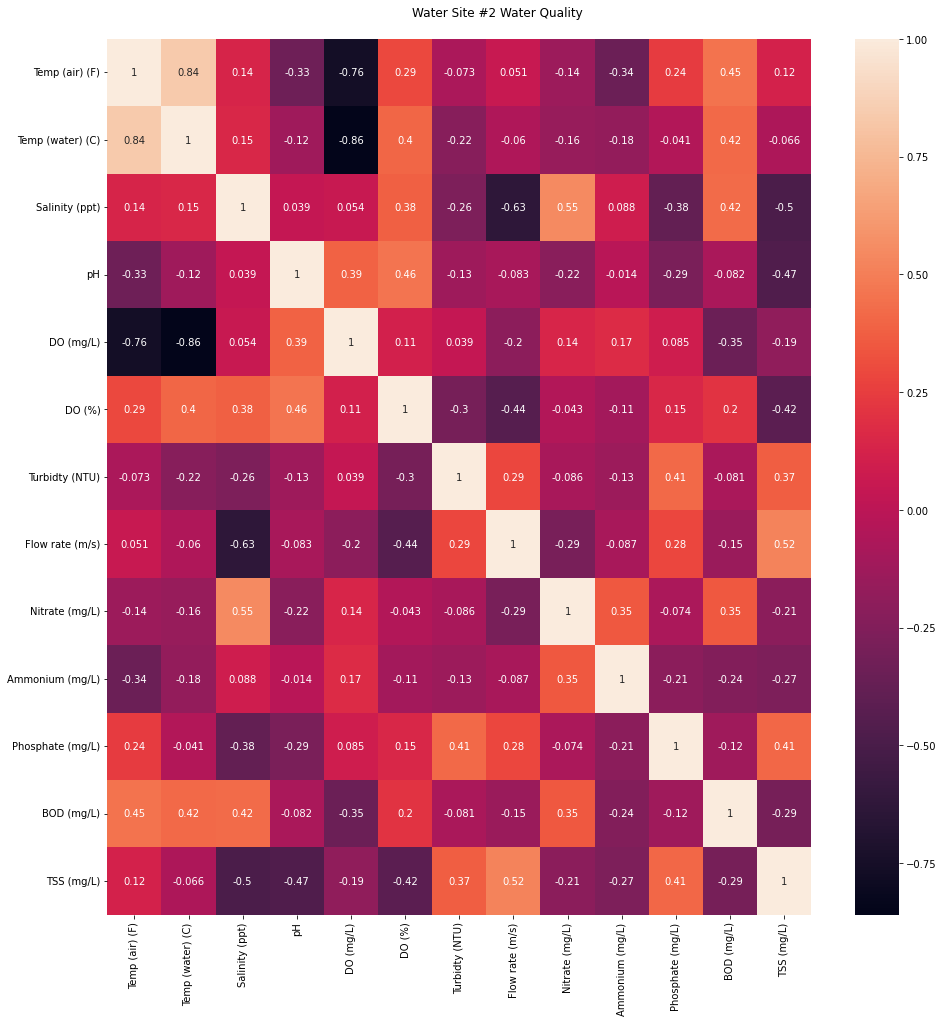

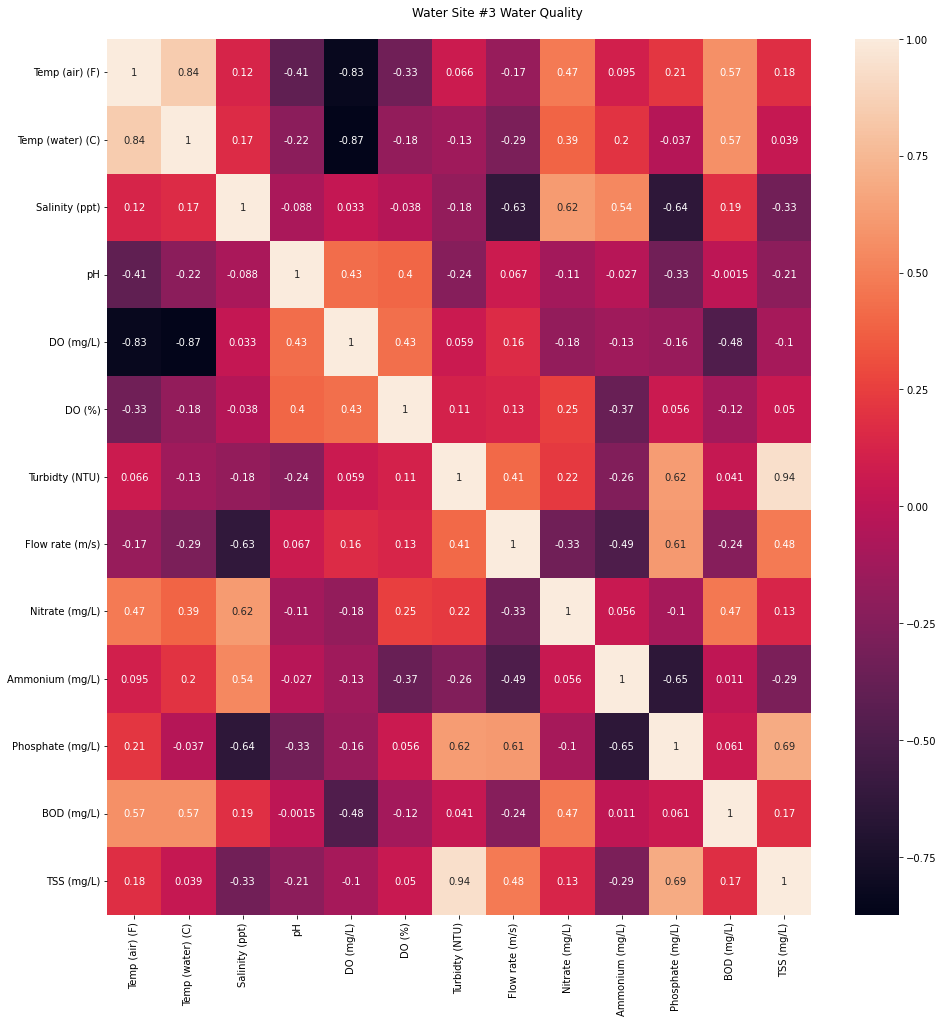

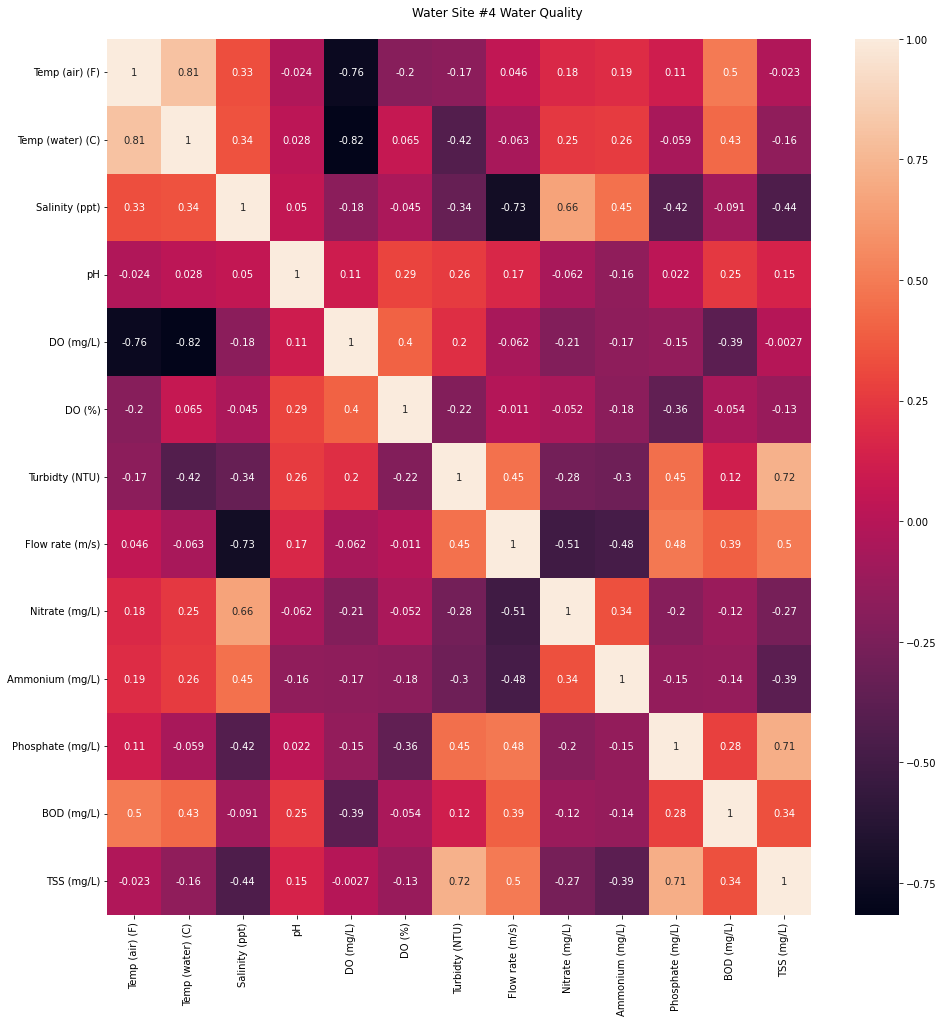

In [25]:
def make_correlation_matrix(dataframe, name, filename):
    corr_matrix = dataframe.corr()
    plt.subplots(figsize=(15,15))
    figure = sn.heatmap(corr_matrix, annot=True).get_figure()
    figure.tight_layout(pad=5.0)
    figure.suptitle(name)
    figure.subplots_adjust(top=0.95)
    figure.savefig(filename)
    corr_matrix = dataframe.corr()

make_correlation_matrix(water_quality_df_1, "Water Site #1 Water Quality",'water-site-1-cm.png')
make_correlation_matrix(water_quality_df_2, "Water Site #2 Water Quality",'water-site-2-cm.png')
make_correlation_matrix(water_quality_df_3, "Water Site #3 Water Quality",'water-site-3-cm.png')
make_correlation_matrix(water_quality_df_4, "Water Site #4 Water Quality",'water-site-4-cm.png')

pickle.dump(water_quality_df_1, open("water_quality_df_1.pkl",'wb'))
pickle.dump(water_quality_df_2, open("water_quality_df_2.pkl",'wb'))
pickle.dump(water_quality_df_3, open("water_quality_df_3.pkl",'wb'))
pickle.dump(water_quality_df_4, open("water_quality_df_4.pkl",'wb'))

In [26]:
### Make data for a model
"""

DO	0.17
FC	0.16
pH	0.11
BOD	0.11
Temperature	0.1
Nitrate	0.1
Total Phosphate	0.1
Turbidity	0.08
Total Solids	0.07

Into by evenly distributing missing value

DO	0.19
pH	0.13
BOD	0.13
Temperature	0.12
Nitrate	0.12
Total Phosphate	0.12
Turbidity	0.10
Total Solids	0.09

TS = TSS + TDS
"""
### Calculate WQI score for every site

do = 0.19
ph = 0.13
bod = 0.13
temperature = 0.12
nitrate= 0.12
phosphate=0.12
turbidity=0.10
ts = 0.09
#water_quality_df_1['wqi'] = 